
#### Data dictionary:

* **survived** - Survival (0 = No; 1 = Yes)
* **pclass** - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **name** - Name
* **sex** - Sex
* **age** - Age
* **sibsp** - Number of Siblings/Spouses aboard
* **parch** - Number of Parents/Children aboard
* **ticket** - Ticket Number
* **fare** - Passenger Fare
* **cabin** - Cabin
* **embarked** - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data through pandas: 

In [2]:
titanic_train=pd.read_csv('titanic_train.csv')  #Train data
titanic_test=pd.read_csv('titanic_test.csv')    #Test data
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Size of the data:

In [4]:
titanic_train.shape

(891, 12)

Checking for data types and integrity of the data: 

In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the above chart, some null values can be  identified in the `age`, `cabin`, and `embarked`. We'll examine them further later on

Descriptive statistics:

In [6]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing data:

In [7]:
missing=titanic_train.isnull().sum().sort_values(ascending=False)
percent_missing = round(titanic_train.isnull().sum()/titanic_train.isnull().count()*100,  2).sort_values()
missing_df=pd.concat([missing,  percent_missing],axis=1, keys=['Missing points','%'])
missing_df.head()

,Missing points,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00


There are 3 categories of data that have missing points.
* `Cabin` has the largest amount of null values (77%),which might lead us to either examine it further or just drop it since there are a lot of missing data within that feature
* `age`has almost 20% of null values, and since it is a numerical feature that approaches a normal distribution, we'll see if we can impute the missing data with the measures of central tendency (mean, median or mode) or drop some observations.
* `embarked`has only 2 null values, which can be easily filled with the most occurrying value.

### Exploratory Data Analysis

Distribution of the `sex` of the passengers within the dataset :

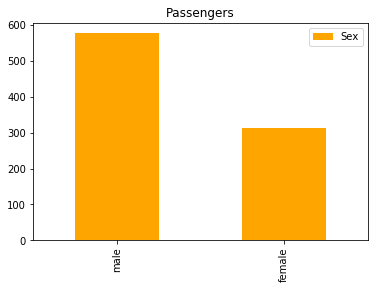

In [8]:
ax=titanic_train.Sex.value_counts().plot(kind='bar',color='orange')
xlabels=[20,30]
plt.legend()
plt.title('Passengers')
#ax.set_yticklabels(xlabels)
plt.show()

Percentage of people that `survived` the Titanic according to this dataset:

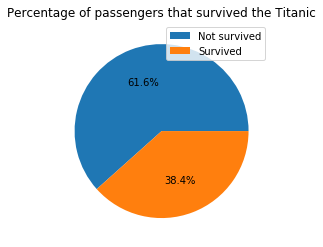

In [9]:
plt.pie(titanic_train.Survived.value_counts(),autopct='%1.1f%%');
labels=['Not survived','Survived']
plt.legend(labels,loc=1)
plt.title('Percentage of passengers that survived the Titanic')
plt.show()

Men and Women that survived the Titanic:

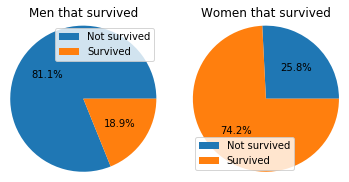

In [10]:

data_male=titanic_train[titanic_train.Sex=='male'].Survived.value_counts()
data_female=titanic_train[titanic_train.Sex=='female'].Survived.value_counts().sort_index()

fig,(ax1,ax2)=plt.subplots(1,2)

ax1.pie(data_male,radius=1.2,autopct='%1.1f%%')
ax1.set_title('Men that survived')
ax1.legend(['Not survived','Survived'],loc=0)

ax2.pie(data_female,radius=1.2,autopct='%1.1f%%')
ax2.set_title('Women that survived')
ax2.legend(['Not survived','Survived'],loc=0)

plt.show()

Distribution of the data of Men and Women that both survived and not survived:

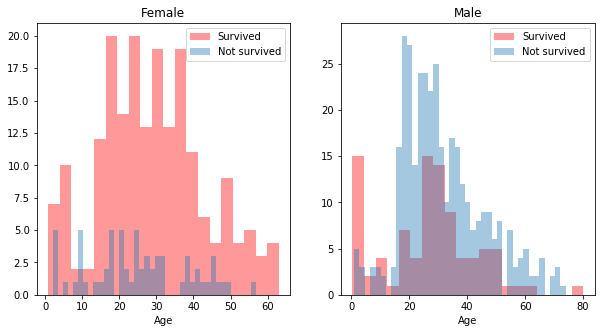

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
women = titanic_train[titanic_train['Sex']=='female']
men = titanic_train[titanic_train['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=20, label = 'Survived', ax = axes[0], kde =False,color='r')
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = 'Not survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = 'Survived', ax = axes[1], kde = False,color='r')
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'Not survived', ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')
plt.show()

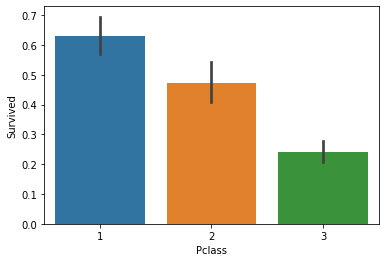

In [12]:
sns.barplot(x='Pclass', y='Survived', data=titanic_train);

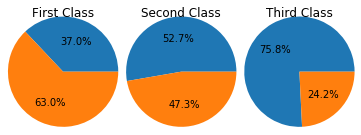

Legend:
Orange:Survived
Blue:Not survived


In [13]:
#male:
data_1=titanic_train[titanic_train.Pclass==1].Survived.value_counts().sort_index()
data_2=titanic_train[titanic_train.Pclass==2].Survived.value_counts()
data_3=titanic_train[titanic_train.Pclass==3].Survived.value_counts()

fig,(ax1,ax2,ax3)=plt.subplots(1,3)

ax1.pie(data_1,radius=1.4,autopct='%1.1f%%')
ax1.set_title('First Class')
#ax1.legend(['Not survived','Survived'],loc=0)

ax2.pie(data_2,radius=1.4,autopct='%1.1f%%')
ax2.set_title('Second Class')
#ax2.legend(['Not survived','Survived'],loc=5)


ax3.pie(data_3,radius=1.4,autopct='%1.1f%%')
ax3.set_title('Third Class')
#ax3.legend(['Not survived','Survived'],loc=10)

plt.show()

print('Legend:')
print('Orange:Survived')
print('Blue:Not survived')

Survived =0 -> Not survived
Survived=1 -> Survived


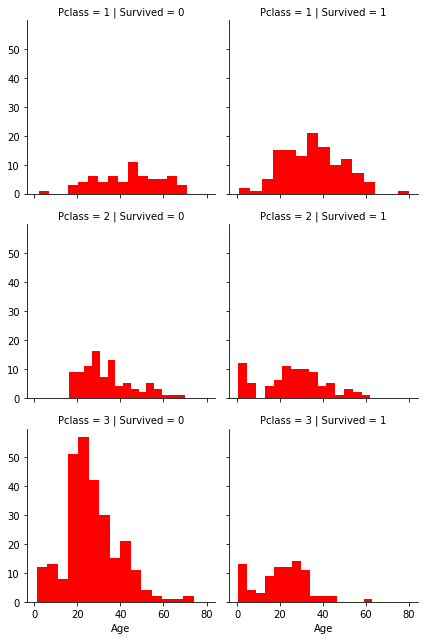

In [14]:
g = sns.FacetGrid(titanic_train, col="Survived",  row="Pclass")
g = g.map(plt.hist, "Age",alpha=1,bins=15,color='r')
print('Survived =0 -> Not survived')
print('Survived=1 -> Survived')

Legend:
Orange:Survived
Blue:Not survived


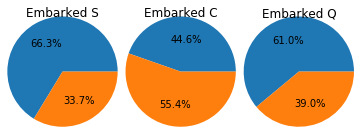

In [15]:
#male:
data_1=titanic_train[titanic_train.Embarked=='S'].Survived.value_counts()
data_2=titanic_train[titanic_train.Embarked=='C'].Survived.value_counts().sort_index()
data_3=titanic_train[titanic_train.Embarked=='Q'].Survived.value_counts()

fig,(ax1,ax2,ax3)=plt.subplots(1,3)

ax1.pie(data_1,radius=1.4,autopct='%1.1f%%')
ax1.set_title('Embarked S')
#ax1.legend(['Not survived','Survived'],loc=0)

ax2.pie(data_2,radius=1.4,autopct='%1.1f%%')
ax2.set_title('Embarked C')
#ax2.legend(['Not survived','Survived'],loc=5)


ax3.pie(data_3,radius=1.4,autopct='%1.1f%%')
ax3.set_title('Embarked Q')
#ax3.legend(['Not survived','Survived'],loc=10)

print('Legend:')
print('Orange:Survived')
print('Blue:Not survived')
plt.show()

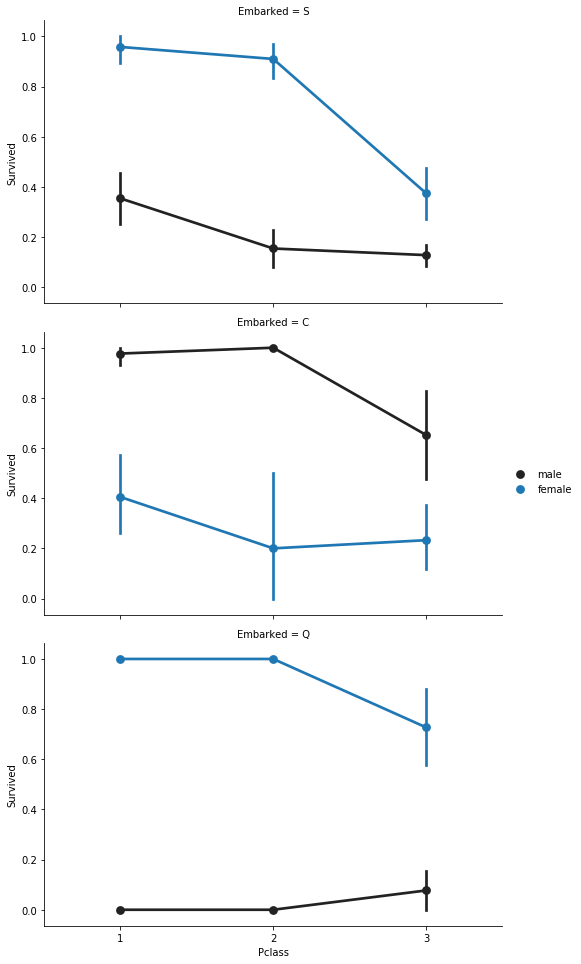

In [16]:
FacetGrid = sns.FacetGrid(titanic_train, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [17]:
#plt.figure(0)
#plt.pie(titanic[titanic.sex=='male'].survived.value_counts(),autopct='%1.1f%%')
#labels=['Not survived','Survived']
#plt.legend(labels,loc=1)
#plt.title('Percentage of male passengers that survived the Titanic')

#plt.figure(1)
#plt.pie(titanic[titanic.sex=='female'].survived.value_counts(),autopct='%1.1f%%')
#plt.show
#plt.legend(labels,loc=1)
#plt.title('Percentage of male passengers that survived the Titanic')

C:\Users\Usuario\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Usuario\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


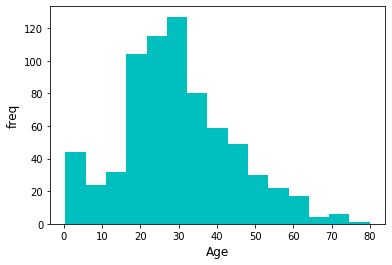

In [18]:
plt.hist(titanic_train['Age'],color='c',bins=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('freq',fontsize=12)
plt.show()

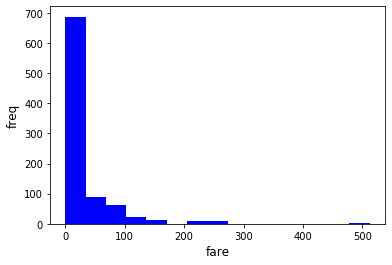

In [19]:
plt.hist(titanic_train.Fare,color='b',bins=15)
plt.xlabel('fare',fontsize=12)
plt.ylabel('freq',fontsize=12)
plt.show()

### Data preprocessing:

#### Missing data:

#### `Embarked` :

We'll first apporach the `embarked` column. Since it only has 2 missing values, we'll fill it in with the most ocurring value:

In [20]:
titanic_train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [21]:
titanic_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
#The most ocurrying 'embarked' place is : 'S' (Southampton)
titanic_train['Embarked']=titanic_train['Embarked'].fillna('S')

In [23]:
#Checking for absence of null values in 'embarked':
titanic_train.Embarked.isnull().sum()

0

#### `Age` :

In [24]:
titanic_df=titanic_train.copy()

titanic_df['Age'].isnull().sum()

177

In [25]:
median=titanic_train['Age'].median()

Filling with the median:

In [26]:
titanic_df['Age']=titanic_df['Age'].fillna(median)

#### `Cabin` :

In [ ]:
titanic_df['Cabin']=titanic_df.map({'A':0, 'B':1, 'C':2,'D':3,'E':4,'F':5,'G':6})

In [27]:
titanic_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [50]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna("U0")

titanic_df['Deck']=titanic_df['Cabin'].str[0]
#We create a dictionary so we can map and convert them into numeric values: 
deck={"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,U


In [51]:
#We now encode the 'Deck' column: 

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
titanic_df['Deck']=titanic_df['Deck'].map(deck)
titanic_df['Deck']=titanic_df['Deck'].fillna(0) #filling with zeros the null values.

In [53]:
#Converting 'Deck' into a numeric value:

titanic_df['Deck'] = titanic_df['Deck'].astype(int)

array([8, 3, 5, 7, 4, 1, 2, 6, 0])

In [57]:
#We'll now drop the Cabin feature.

#titanic_df=titanic_df.drop('Cabin',axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8


#### `SibSp and Parch features`:

Since `SibSp`gives us the information about how many siblings/spouses aboard the Titanic are, and `Parch` refers to the number of Parents or children aboard the Titanic, it makes sense to create a new feature that combines the both so we can see how many relatives aboard in total a passenger had.

In [82]:
#Training data:
titanic_df['Relatives']=titanic_df['SibSp']+titanic_df['Parch']
titanic_df.head(10)

#Doing the same with the test data:
titanic_test['Relatives']=titanic_test['SibSp']+titanic_test['Parch']

#We'll also create a new feature that containts a binary variable and tells us whether or not the passenger was alone:

#Training data:
titanic_df.loc[titanic_df['Relatives'] > 0, 'Accomp'] = 0
titanic_df.loc[titanic_df['Relatives'] == 0, 'Accomp'] = 1

dataset['not_alone'] = dataset['not_alone'].astype(int)

In [83]:
help(titanic_df.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above)
 |  
 |  See more at :ref:`Selection by Labe